<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Unsupervised%20Learning/SVD/image_compression_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVD for Image Compression

**Singular Value Decomposition (SVD)** is a powerful matrix factorization technique widely used in image compression, dimensionality reduction, and data approximation.  
It works by breaking a matrix (such as a grayscale image) into three components, allowing you to approximate the original image using only the most significant singular values and vectors.



## General Process

1. **Input**  
   A grayscale image represented as a matrix **A** of pixel intensities.

2. **Decomposition**  
   Apply SVD to factor **A** into:
   - **U**: Left singular vectors (orthogonal)
   - **Σ (Sigma)**: Diagonal matrix of singular values (importance weights)
   - **Vᵗ**: Right singular vectors (orthogonal)

   Mathematically:  
   A ≈ U × Σ × Vᵗ

3. **Compression**  
   Keep only the top **k** largest singular values and their corresponding vectors:
   - Reduces the rank of the matrix, retaining most of the image’s important features.
   - Discards smaller singular values that contribute less to image quality.

4. **Reconstruction**  
   Multiply the reduced matrices to approximate the original image:
   A<sub>k</sub> = U<sub>k</sub> × Σ<sub>k</sub> × V<sub>k</sub>ᵗ



## Advantages of SVD for Image Compression

- **High Compression Efficiency**  
  Can drastically reduce file size while preserving essential image details.

- **Rank Control**  
  Allows you to adjust **k** (number of singular values) to balance between compression and quality.

- **Noise Reduction**  
  Discards small singular values, effectively removing minor noise.

- **Mathematically Robust**  
  Provides an optimal low-rank approximation in terms of Frobenius norm.



## Disadvantages of SVD for Image Compression

- **Computationally Intensive**  
  SVD calculation is expensive for large images or datasets.

- **Not Ideal for Real-Time Compression**  
  Slower than specialized image formats like JPEG or PNG.

- **Works Best on Grayscale or Single-Channel Images**  
  Needs extra handling for multi-channel (RGB) images.



## Application

In this project, SVD was applied to compress two types of images:

1. **Landscape Image**
   - A photo of a riverside night scene.
   - Purpose: To evaluate SVD’s ability to compress complex backgrounds, lights, and textures.

2. **Human Portrait**
   - A photo of myself.
   - Purpose: To see how SVD handles human facial features, skin textures, and personal details.

### Process Summary

- Converted each image to grayscale.
- Applied SVD and reconstructed compressed versions using varying **k** values.
- Compared visual quality and file size between landscape and human images.
- Analyzed how much detail was preserved or lost at different compression levels.



### Goal

The goal was to explore how well SVD-based compression performs on **natural landscapes** versus **human portraits**, understanding the trade-offs between rank reduction and image fidelity across different image types.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Correct URL format (use raw.githubusercontent.com)
url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Unsupervised%20Learning/SVD/city%20night%20life.jpg"

# Load color image (shape: height × width × 3)
try:
    image_color = io.imread(url)
    print("Image loaded successfully! Shape:", image_color.shape)
except Exception as e:
    print("Error loading image:", e)
    # Fallback: Use a local file
    # image_color = io.imread("local_image.jpg")

Image loaded successfully! Shape: (3024, 4032, 3)


In [ ]:
# Normalize pixel values to [0, 1]
image_color = image_color / 255.0

# Verify RGB channels
if image_color.shape[-1] != 3:
    raise ValueError("Image must have 3 color channels (RGB)")

In [ ]:
# define function
def compress_channel(channel, k=50):
    """Compress a single channel using SVD."""
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    compressed = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    return np.clip(compressed, 0, 1)  # Ensure valid pixel range

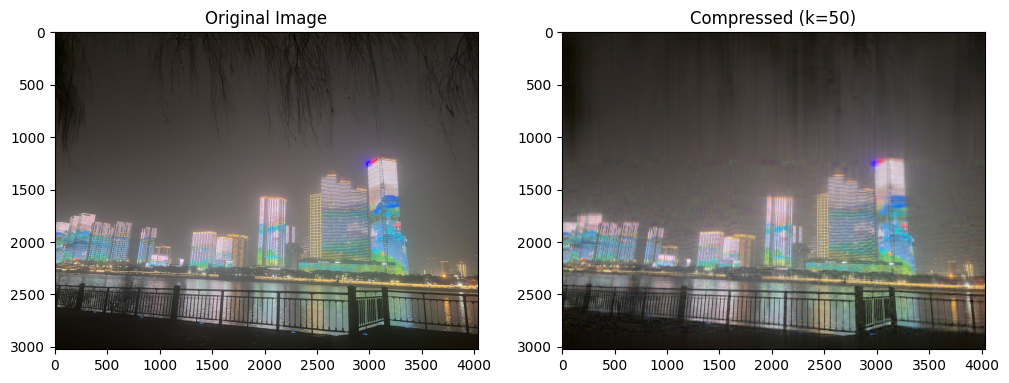

In [ ]:
# Compress all 3 channels
k = 50  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color = np.stack(compressed_channels, axis=-1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 36578304
Compressed size: 1058550
Compression ratio: 34.6x


this is very clear! let's lower the k value to see whether we can still see the tree branches :)

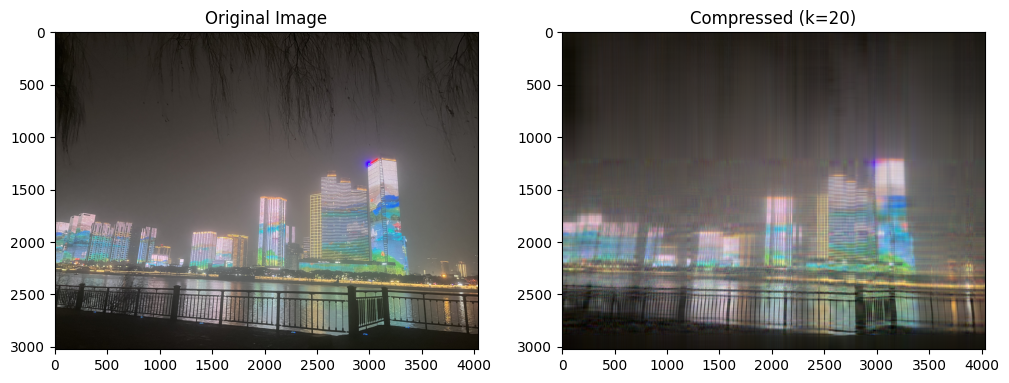

In [ ]:
# lower the value
k = 20  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color)
plt.title(f"Compressed (k={k})")

plt.show()

Though a bit blurry, you can still tell it's a night scene along the riverside.

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 36578304
Compressed size: 423420
Compression ratio: 86.4x


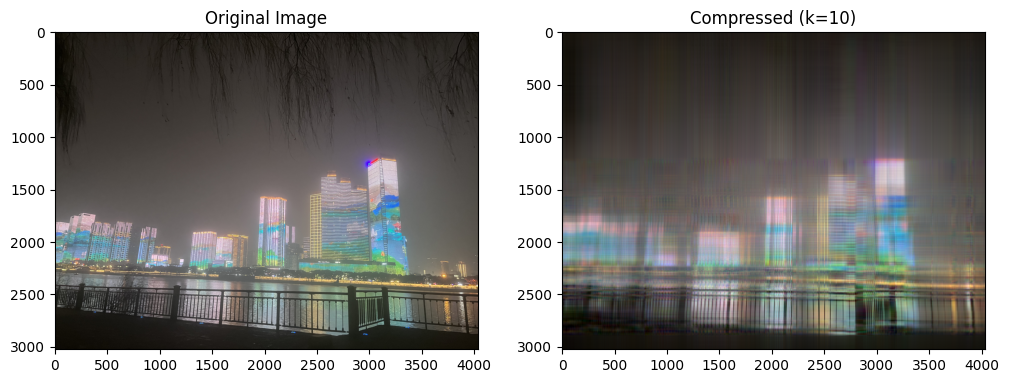

In [ ]:
# lower the value
k = 10  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 36578304
Compressed size: 211710
Compression ratio: 172.8x


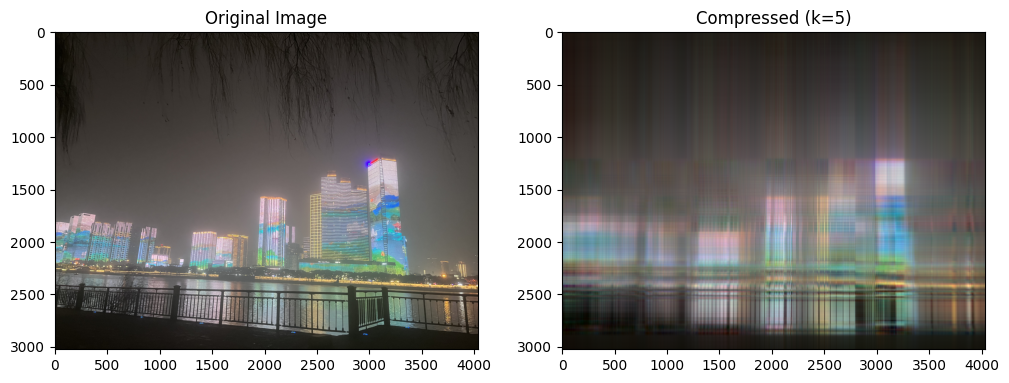

In [ ]:
# lower the value
k = 5 # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 36578304
Compressed size: 105855
Compression ratio: 345.6x


oh no...! you can still see the fences, but without the prior context, it'll probably be a hard time figuring what the image is.

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 36578304
Compressed size: 105855
Compression ratio: 345.6x


let's try an image potraiting people - me!

In [ ]:
# Correct URL format (use raw.githubusercontent.com)
url1 = "https://raw.githubusercontent.com/mocccca/cmor438/main/Unsupervised%20Learning/SVD/me.JPG"

# Load color image (shape: height × width × 3)
try:
    image_color1 = io.imread(url1)
    print("Image loaded successfully! Shape:", image_color1.shape)
except Exception as e:
    print("Error loading image:", e)
    # Fallback: Use a local file
    # image_color = io.imread("local_image.jpg")

Image loaded successfully! Shape: (3024, 4032, 3)


In [ ]:
# Normalize pixel values to [0, 1]
image_color1 = image_color1 / 255.0

# Verify RGB channels
if image_color1.shape[-1] != 3:
    raise ValueError("Image must have 3 color channels (RGB)")

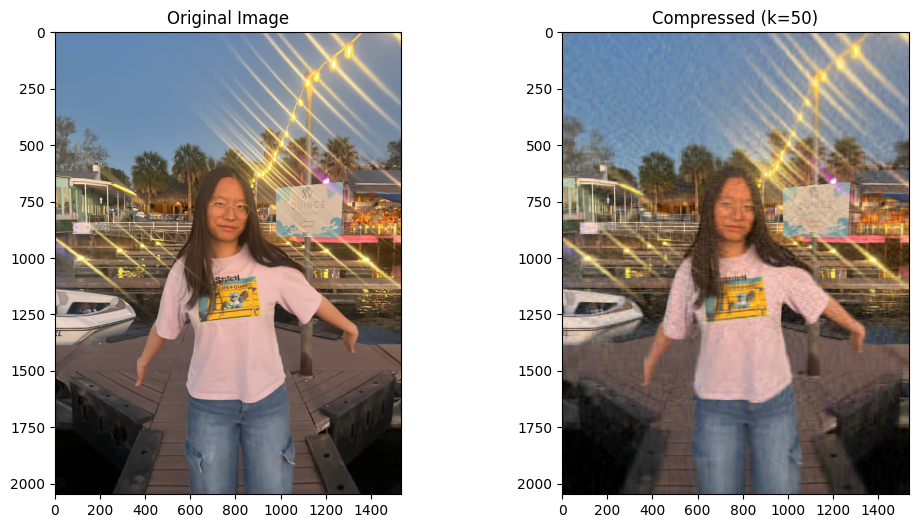

In [ ]:
k = 50  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color1[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color1 = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color1)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color1)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size1 = image_color1.size  # Total pixels × channels
compressed_size1 = k * (image_color1.shape[0] + image_color1.shape[1] + 1) * 3
ratio1 = original_size1 / compressed_size1

print(f"Original size: {original_size1}")
print(f"Compressed size: {compressed_size1}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 9437184
Compressed size: 537750
Compression ratio: 17.5x


ok you can still tell this is me and I'm at the dock, though the colors aren't as pure as the original photo.

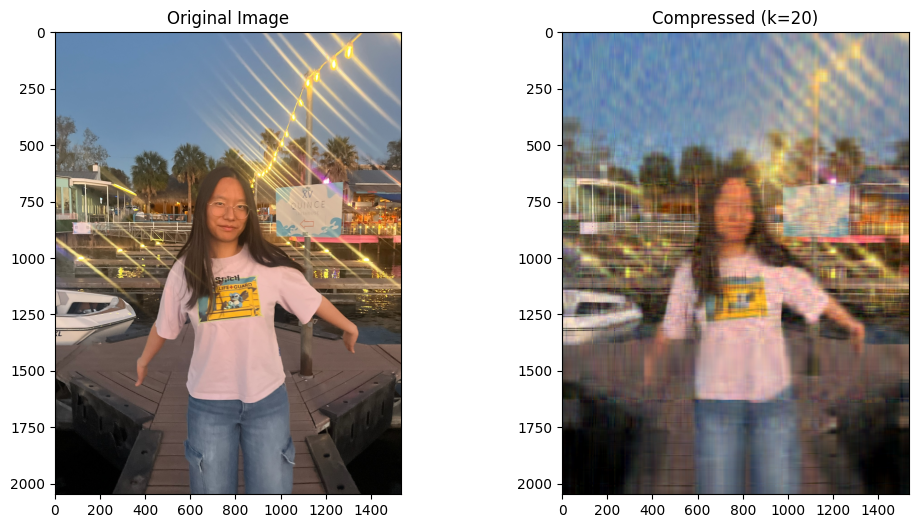

In [ ]:
k = 20  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color1[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color1 = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color1)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color1)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size1 = image_color1.size  # Total pixels × channels
compressed_size1 = k * (image_color1.shape[0] + image_color1.shape[1] + 1) * 3
ratio1 = original_size1 / compressed_size1

print(f"Original size: {original_size1}")
print(f"Compressed size: {compressed_size1}")
print(f"Compression ratio: {ratio1:.1f}x")

Original size: 9437184
Compressed size: 215100
Compression ratio: 43.9x


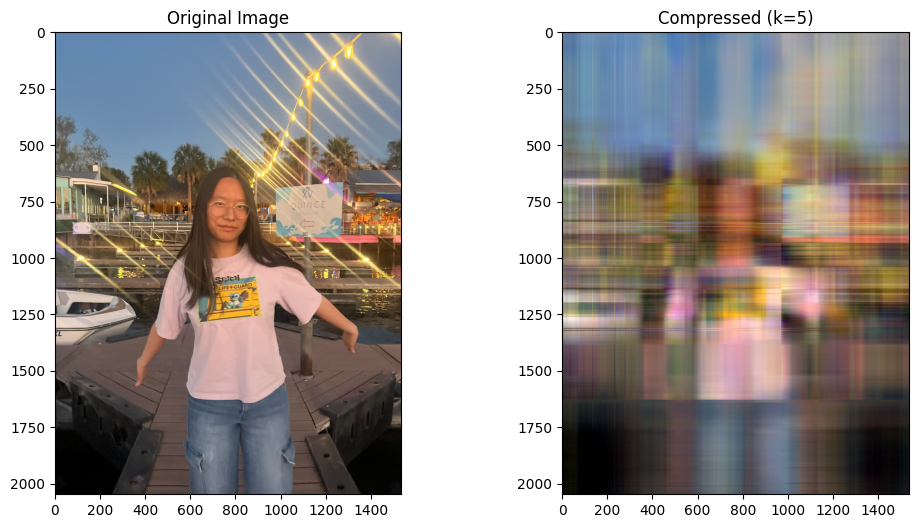

In [ ]:
k = 5  # Number of singular values to keep
compressed_channels = [
    compress_channel(image_color1[:, :, i], k)
    for i in range(3)
]

# Combine channels
compressed_color1 = np.stack(compressed_channels, axis=-1)

# plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_color1)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(compressed_color1)
plt.title(f"Compressed (k={k})")

plt.show()

In [ ]:
original_size = image_color.size  # Total pixels × channels
compressed_size = k * (image_color.shape[0] + image_color.shape[1] + 1) * 3
ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {ratio:.1f}x")

Original size: 9437184
Compressed size: 107550
Compression ratio: 87.7x


thus it's a lot harder to apply SVD on human images, as they often contains more details, and lower singular values could easily distort a lot of details compared to landscape pictures.